## __Business Content__
Bellabeat is a company dedicated to women's wellness, offering products and apps for stress management, hydration, and habit formation.

## __Analysis Objective__
Identify the key factors influencing the demand for SMAFI products.

## Data Sets

These data sets, is in CSV format and there are around of the data sets 33 users and 31 days

__There are 18 data sets:__
* dailyActivity_merged
* dailyCalories_merged
* dailyIntensities_merged
* dailySteps_merged
* heartrate_seconds_merged
* hourlyCalories_merged
* hourlyIntensities_merged
* hourlySteps_merged
* minuteCaloriesNarrow_merged 
* minuteIntensitiesNarrow_merged
* minuteIntensitiesWide_merged
* minuteMETsNarrow_merged
* minuteSleep_merged
* minuteStepsNarrow_merged
* minuteStepsWide_merged
* sleepDay_merged
* weightLogInfo_merged


## Install Packages

In [16]:
options(repos = "https://mirror.chpc.utah.edu/pub/cran/")
install.packages("tidyverse")
install.packages("lubridate")
install.packages("dplyr")
install.packages("ggplot2")
install.packages("tidyr")
install.packages("readr")
install.packages("stringr")
install.packages("janitor")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Loading Packages

In [ ]:
library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
library(tidyr)
library(readr)
library(stringr)
library(janitor)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [ ]:
daily_activity <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv") 
hourly_calories <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv") 
hourly_intensity <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv") 
sleep_day <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv") 
weight_log_info <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv") 

## View the Data

In [ ]:
head(daily_activity)
str(daily_activity)

head(hourly_calories)
str(hourly_calories)

head(hourly_intensity)
str(hourly_intensity)

head(sleep_day)
str(sleep_day)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


'data.frame':	940 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 

,Id,ActivityHour,Calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,81
2,1503960366,4/12/2016 1:00:00 AM,61
3,1503960366,4/12/2016 2:00:00 AM,59
4,1503960366,4/12/2016 3:00:00 AM,47
5,1503960366,4/12/2016 4:00:00 AM,48
6,1503960366,4/12/2016 5:00:00 AM,48


'data.frame':	22099 obs. of  3 variables:
 $ Id          : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour: chr  "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ Calories    : int  81 61 59 47 48 48 48 47 68 141 ...


,Id,ActivityHour,TotalIntensity,AverageIntensity
,<dbl>,<chr>,<int>,<dbl>
1,1503960366,4/12/2016 12:00:00 AM,20,0.333333
2,1503960366,4/12/2016 1:00:00 AM,8,0.133333
3,1503960366,4/12/2016 2:00:00 AM,7,0.116667
4,1503960366,4/12/2016 3:00:00 AM,0,0.000000
5,1503960366,4/12/2016 4:00:00 AM,0,0.000000
6,1503960366,4/12/2016 5:00:00 AM,0,0.000000


'data.frame':	22099 obs. of  4 variables:
 $ Id              : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour    : chr  "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ TotalIntensity  : int  20 8 7 0 0 0 0 0 13 30 ...
 $ AverageIntensity: num  0.333 0.133 0.117 0 0 ...


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


'data.frame':	413 obs. of  5 variables:
 $ Id                : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay          : chr  "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM" "4/16/2016 12:00:00 AM" ...
 $ TotalSleepRecords : int  1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: int  327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : int  346 407 442 367 712 320 377 364 384 449 ...


## Fixing formatting
First of all, we want to know what is the function that we have to use to convert character vector o factor. So going to use Class() function.

In [ ]:
class(daily_activity$ActivityDate)
class(hourly_calories$ActivityHour)
class(hourly_intensity$ActivityHour)
class(sleep_day$SleepDay)

[1] "character"

[1] "character"

[1] "character"

[1] "character"

In [ ]:
# Daily Activities
daily_activity <- daily_activity %>%
  mutate(date = format(ActivityDate, format = "%m/%d/%Y"))
str(daily_activity)
class(daily_activity$ActivityDate) 

# Hourly Calories
hourly_calories <- hourly_calories %>%
  mutate(
    ActivityHour_POSIX = parse_date_time(ActivityHour, orders = "%m/%d/%Y %I:%M:%S %p", tz = "UTC"), 
    time = format(ActivityHour_POSIX, format = "%H:%M:%S"),  # Format time (from POSIXct)
    date = format(ActivityHour_POSIX, format = "%m/%d/%Y")   # Format date (from POSIXct)
  )

str(hourly_calories) # Check the updated structure
class(hourly_calories$ActivityHour)

# Hourly Intensities
hourly_intensity <- hourly_intensity %>%
  mutate(
    ActivityHour = str_squish(ActivityHour), # 1. Remove Whitespace 
    ActivityHour_POSIX = parse_date_time(ActivityHour, orders = "%m/%d/%Y %I:%M:%S %p", tz = "UTC"), # 2. Correct orders
    time = format(ActivityHour_POSIX, format = "%H:%M:%S", tz = "UTC"), # 3. Format Time
    date = format(ActivityHour_POSIX, format = "%m/%d/%Y", tz = "UTC")  # 4. Format Date
  )

str(hourly_intensity)  # 5. Check the structure 
class(hourly_intensity$ActivityHour)

# Sleep Day
sleep_day <- sleep_day %>%
  mutate(
    SleepDay = str_squish(SleepDay),  # 1. Remove Whitespace 
    SleepDay_POSIX = parse_date_time(SleepDay, orders = "%m/%d/%Y %I:%M:%S %p", tz = "UTC"), # 2. Convert to POSIXct (UTC)
    time = format(SleepDay_POSIX, format = "%H:%M:%S", tz = "UTC"), # 3. Format Time (UTC)
    date = format(SleepDay_POSIX, format = "%m/%d/%Y", tz = "UTC")  # 4. Format Date (UTC)
  )

str(sleep_day)  # 5. Check the structure
class(sleep_day$SleepDay)

'data.frame':	940 obs. of  16 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 

[1] "character"

'data.frame':	22099 obs. of  6 variables:
 $ Id                : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour      : chr  "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ Calories          : int  81 61 59 47 48 48 48 47 68 141 ...
 $ ActivityHour_POSIX: POSIXct, format: "2016-04-12 00:00:00" "2016-04-12 01:00:00" ...
 $ time              : chr  "00:00:00" "01:00:00" "02:00:00" "03:00:00" ...
 $ date              : chr  "04/12/2016" "04/12/2016" "04/12/2016" "04/12/2016" ...


[1] "character"

'data.frame':	22099 obs. of  7 variables:
 $ Id                : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour      : chr  "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ TotalIntensity    : int  20 8 7 0 0 0 0 0 13 30 ...
 $ AverageIntensity  : num  0.333 0.133 0.117 0 0 ...
 $ ActivityHour_POSIX: POSIXct, format: "2016-04-12 00:00:00" "2016-04-12 01:00:00" ...
 $ time              : chr  "00:00:00" "01:00:00" "02:00:00" "03:00:00" ...
 $ date              : chr  "04/12/2016" "04/12/2016" "04/12/2016" "04/12/2016" ...


[1] "character"

'data.frame':	413 obs. of  8 variables:
 $ Id                : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay          : chr  "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM" "4/16/2016 12:00:00 AM" ...
 $ TotalSleepRecords : int  1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: int  327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : int  346 407 442 367 712 320 377 364 384 449 ...
 $ SleepDay_POSIX    : POSIXct, format: "2016-04-12" "2016-04-13" ...
 $ time              : chr  "00:00:00" "00:00:00" "00:00:00" "00:00:00" ...
 $ date              : chr  "04/12/2016" "04/13/2016" "04/15/2016" "04/16/2016" ...


[1] "character"

## Exploring and Summarizing Data
We want to know the duplicate data, we going to use n_distinct() and summary() function.
Let's star with n_distinct() function. 

In [ ]:
n_distinct(daily_activity$Id)
n_distinct(hourly_calories$Id)
n_distinct(hourly_intensity$Id)
n_distinct(sleep_day$Id)
n_distinct(weight_log_info$Id)

[1] 33

[1] 33

[1] 33

[1] 24

[1] 8


This information tell us that are 33 women in daily Activity, 33 women in Hourly Calories, 33 women in Hourly Intensities, 24 women Sleep Day and 8 women in Weight Login Information.

Now we are going to use summary() function.

In [ ]:
# Daily Activity
daily_activity %>%  
  select(TotalSteps,
         TotalDistance,
         SedentaryMinutes, Calories) %>%
  summary()

# explore number of active minutes per category
daily_activity %>%
  select(VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes) %>%
  summary()

# calories
hourly_calories %>%
  select(Calories) %>%
  summary()

# sleep
sleep_day %>%
  select(TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed) %>%
  summary()

# weight
weight_log_info %>%
  select(WeightKg, BMI) %>%
  summary()

   TotalSteps    TotalDistance    SedentaryMinutes    Calories   
 Min.   :    0   Min.   : 0.000   Min.   :   0.0   Min.   :   0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8   1st Qu.:1828  
 Median : 7406   Median : 5.245   Median :1057.5   Median :2134  
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2   Mean   :2304  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5   3rd Qu.:2793  
 Max.   :36019   Max.   :28.030   Max.   :1440.0   Max.   :4900  

 VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes
 Min.   :  0.00    Min.   :  0.00      Min.   :  0.0       
 1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:127.0       
 Median :  4.00    Median :  6.00      Median :199.0       
 Mean   : 21.16    Mean   : 13.56      Mean   :192.8       
 3rd Qu.: 32.00    3rd Qu.: 19.00      3rd Qu.:264.0       
 Max.   :210.00    Max.   :143.00      Max.   :518.0       

    Calories     
 Min.   : 42.00  
 1st Qu.: 63.00  
 Median : 83.00  
 Mean   : 97.39  
 3rd Qu.:108.00  
 Max.   :948.00  

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.000     Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.000     1st Qu.:361.0      1st Qu.:403.0  
 Median :1.000     Median :433.0      Median :463.0  
 Mean   :1.119     Mean   :419.5      Mean   :458.6  
 3rd Qu.:1.000     3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.000     Max.   :796.0      Max.   :961.0  

    WeightKg           BMI       
 Min.   : 52.60   Min.   :21.45  
 1st Qu.: 61.40   1st Qu.:23.96  
 Median : 62.50   Median :24.39  
 Mean   : 72.04   Mean   :25.19  
 3rd Qu.: 85.05   3rd Qu.:25.56  
 Max.   :133.50   Max.   :47.54  


__Some notable things from the Summary__
  *According to the average the women, sleep 1 time for 7 hours.
  *The Average sedentary time is 991 minutes, equivalent to 16 hours.This concludes that it has to decrease.
  *According the Average, the total steps per day are 7638. CDC research indicates that while an average of 7,638 steps per day is a good start, increasing daily steps can significantly lower mortality risk. Studies show an 8,000-step daily average is linked to a 51% reduced risk of death from any cause. Moreover, individuals taking 12,000 steps daily may experience a 65% lower mortality risk compared to those taking only 4,000.
  *The much of the women are little active.

## Inner data
Now, I'm going to do Inner Join in two data sets (daily_activity and sleep_day) for to do the visualization. I'm going to join the "Id" and "Date" (that I previously created after converting data to date time format).

In [ ]:

# 1. Remove whitespace from the original date columns 
sleep_day <- sleep_day %>%
  mutate(SleepDay = str_squish(SleepDay))

daily_activity <- daily_activity %>%
  mutate(ActivityDate = str_squish(ActivityDate))

# 2. Convert dates to consistent character format (mm/dd/yyyy) in both data frames
sleep_day <- sleep_day %>%
  mutate(date = format(parse_date_time(SleepDay, orders = "%m/%d/%Y %I:%M:%S %p", tz = "UTC"), format = "%m/%d/%Y"))

daily_activity <- daily_activity %>%
  mutate(date = format(as.Date(ActivityDate, format = "%m/%d/%Y"), format = "%m/%d/%Y"))

# 3. Perform the left_join
join_data <- left_join(sleep_day, daily_activity, by = c("Id", "date"))

head(join_data)
str(join_data)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,SleepDay_POSIX,time,date,ActivityDate,TotalSteps,⋯,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<int>,<int>,<dttm>,<chr>,<chr>,<chr>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346,2016-04-12,00:00:00,04/12/2016,4/12/2016,13162,⋯,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016 12:00:00 AM,2,384,407,2016-04-13,00:00:00,04/13/2016,4/13/2016,10735,⋯,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/15/2016 12:00:00 AM,1,412,442,2016-04-15,00:00:00,04/15/2016,4/15/2016,9762,⋯,0,2.14,1.26,2.83,0,29,34,209,726,1745
4,1503960366,4/16/2016 12:00:00 AM,2,340,367,2016-04-16,00:00:00,04/16/2016,4/16/2016,12669,⋯,0,2.71,0.41,5.04,0,36,10,221,773,1863
5,1503960366,4/17/2016 12:00:00 AM,1,700,712,2016-04-17,00:00:00,04/17/2016,4/17/2016,9705,⋯,0,3.19,0.78,2.51,0,38,20,164,539,1728
6,1503960366,4/19/2016 12:00:00 AM,1,304,320,2016-04-19,00:00:00,04/19/2016,4/19/2016,15506,⋯,0,3.53,1.32,5.03,0,50,31,264,775,2035


'data.frame':	413 obs. of  22 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay                : chr  "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM" "4/16/2016 12:00:00 AM" ...
 $ TotalSleepRecords       : int  1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep      : int  327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed          : int  346 407 442 367 712 320 377 364 384 449 ...
 $ SleepDay_POSIX          : POSIXct, format: "2016-04-12" "2016-04-13" ...
 $ time                    : chr  "00:00:00" "00:00:00" "00:00:00" "00:00:00" ...
 $ date                    : chr  "04/12/2016" "04/13/2016" "04/15/2016" "04/16/2016" ...
 $ ActivityDate            : chr  "4/12/2016" "4/13/2016" "4/15/2016" "4/16/2016" ...
 $ TotalSteps              : int  13162 10735 9762 12669 9705 15506 10544 9819 14371 10039 ...
 $ TotalDistance           : num  8.5 6.97 6.28 8.16 6.48 ...
 $ TrackerDistance         : num  8.5 6.97


## Visualization

As we can see, there are a correlation between Total Steps and Calories, There more steps more calories we burn.

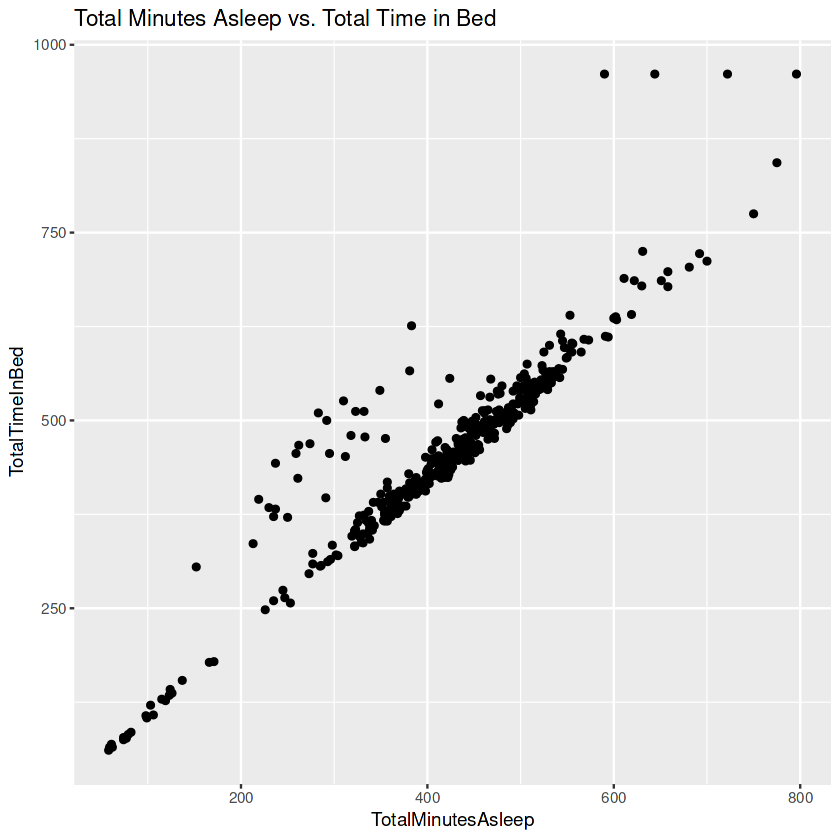

In [26]:
ggplot(data=sleep_day, aes(x=TotalMinutesAsleep, y=TotalTimeInBed)) + 
  geom_point()+ labs(title="Total Minutes Asleep vs. Total Time in Bed")


The relation of Total Minutes Asleep and Total Time in Bed looks linear, The users should consider to use more the application. 

Now, we are going to see intensities data over time (hourly)

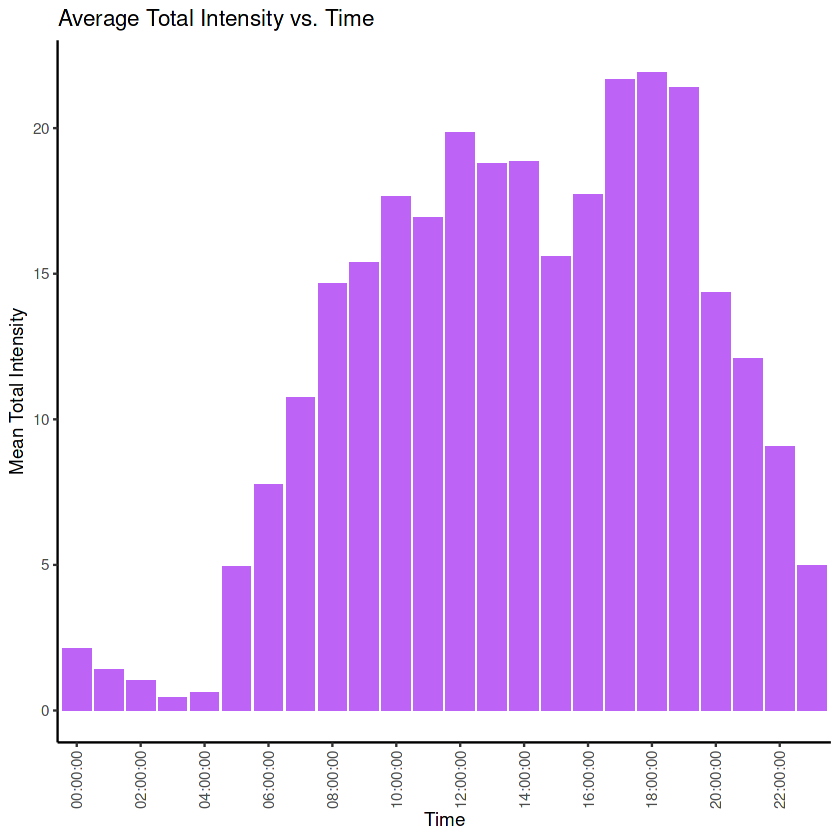

In [27]:
hourly_intensity_new <- hourly_intensity %>%
  group_by(time) %>%
  drop_na() %>%
  summarise(mean_total_intensity = mean(TotalIntensity, na.rm = TRUE), .groups = "drop")

hourly_intensity_new <- hourly_intensity_new %>%
  filter(n() > 1)

# Remove any remaining NAs in mean_total_intensity (if any)
hourly_intensity_new <- hourly_intensity_new %>%
  filter(!is.na(mean_total_intensity))

# Convert 'time' to a factor, ordered by time
hourly_intensity_new <- hourly_intensity_new %>%
  mutate(time = factor(time, levels = unique(time)))  # Order the time factor

# Visualization
ggplot(data = hourly_intensity_new, aes(x = time, y = mean_total_intensity)) +
  geom_col(fill = 'purple', alpha = 0.7) +  # Use geom_col for bars
  theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5),  # Adjusted angle
        panel.background = element_blank(), #Remove background
        panel.grid.major = element_blank(), #Remove grid lines
        panel.grid.minor = element_blank(), #Remove grid lines
        axis.line = element_line(colour = "black")) + #Add axis lines
  labs(title = "Average Total Intensity vs. Time",
       x = "Time",
       y = "Mean Total Intensity") +
  scale_x_discrete(breaks = hourly_intensity_new$time[seq(1, length(hourly_intensity_new$time), by = 2)]) #Adjust x axis breaks

Our visualization of hourly Total Intensity data reveals peak user activity between 5 AM and 10 PM. Notably, activity significantly increases between 5 PM and 7 PM, likely coinciding with people's post-work routines, such as gym visits or evening walks. This insight presents an opportunity within the Bellabeat app: we can leverage this time window to send personalized reminders and motivational messages encouraging users to engage in physical activity.


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


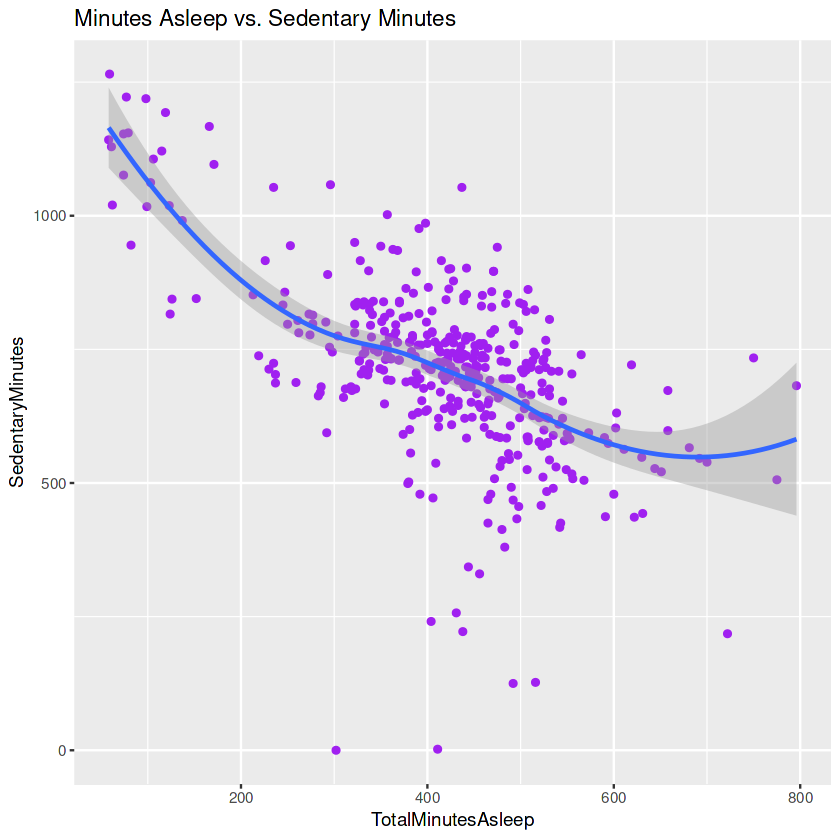

In [28]:
ggplot(data=join_data, aes(x=TotalMinutesAsleep, y=SedentaryMinutes)) + 
geom_point(color='purple') + geom_smooth() +
  labs(title="Minutes Asleep vs. Sedentary Minutes")

* We can see that there are a bad relation between Total Minutes Asleep and Sedentary Minutes.
* The users of Bellabeat want to improve the Hourly Sleep and reduce sedentary time.
* We need more data to discover the cause.

## Recomendations

Bellabeat has successfully established itself as a leading women's wellness company since its inception in 2013, empowering users with valuable insights into their health and lifestyle through data on activity, sleep, stress, and reproductive health.

Based on my analysis of Fitbit Fitness Tracker Data, I've identified a key target audience for Bellabeat's marketing strategy: career-oriented women who prioritize work-life balance. These women, often engaged in sedentary activities like prolonged computer work, strive to maintain a healthy lifestyle through light exercise but may lack the knowledge and motivation to consistently improve their activity levels.

To effectively reach this audience, Bellabeat should position its app as more than just a fitness tracker. It should be marketed as a holistic wellness guide, empowering women to integrate healthy habits into their busy lives through personalized recommendations, education, and motivational support.

Key campaign messaging should emphasize the app's ability to help women balance their professional and personal lives while achieving their health goals.

__Here are some specific app features that could resonate with this target audience:__

*Step Count Goals: Encourage users to aim for at least 8,000 steps daily, highlighting the significant health benefits associated with this step count, such as a reduced risk of all-cause mortality.

*Personalized Nutrition Guidance: Offer suggestions for healthy, low-calorie meal options to support weight management goals.

*Sleep Optimization: Utilize in-app notifications to encourage consistent sleep schedules and potentially recommend reducing sedentary time to improve sleep quality.

*Time-Sensitive Reminders: Leverage the peak activity window between 5 PM and 7 PM to send targeted reminders and motivational messages encouraging users to engage in physical activity, such as a post-work walk or gym session.

I believe these insights and recommendations can significantly enhance Bellabeat's marketing strategy and further solidify its position as a trusted wellness partner for women.
